# Caderno de Limpeza e Exploração dos Dados

## Limpeza dos Dados

### Tratamentos

In [ ]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gocn/df_clean.csv')
df

,Empresa,EBITDA,Divida,Multiplicador do Setor,Margem EBITDA,Peso_margem_ebitda,nota_i1,nota_pi1,Divida liquida/EBTIDA,peso_Divida liquida/EBTIDA,nota_i2,nota_pi2,Indice de liquidez,peso_Indice de liquidez,nota_i3,nota_pi3,Ciclo Financeiro,peso_ciclo_financeiro,nota_i4,nota_pi4,Conversão de Ebitda em FCO,peso_conversao_ebitda_em_fco,nota_i5,nota_pi5,Tempo de atuação em anos,peso_tempo_atuacao,nota_i6,nota_pi6,Auditoria em Demonstrações Financeiras,peso_auditoria,nota_i7,nota_pi7,Pendencias Financeiras,peso_pendencias,nota_i8,nota_pi8,Possui Garantia,peso_garantia,nota_i9,nota_pi9,Possui Seguros,peso_seguros,nota_i10,nota_pi10,Serasa Score,peso_serasa_score,nota_i11,nota_pi11,SCORE GO ON,RATING GO ON,Crédito Concedido?,Valor Limite de Crédito
0,1,32405225,63411286,7.4,8.44,0.2,3,0.6,-0.94,0.1,5,0.5,1.94,0.1,4,0.4,101,0.1,5,0.5,31.81,0.1,2,0.2,4,0.05,2,0.10,Biolab,0.1,2,0.2,Sem pendências,0.05,5,0.25,veículos,0.05,5,0.25,seguro patrimonial,0.05,5,0.25,900,0.1,4,0.4,3.65,4,Sim,176387376
1,2,3527758,9936724,7.4,3.70,0.2,2,0.4,2.23,0.1,2,0.2,0.62,0.1,2,0.2,99,0.1,5,0.5,-10.16,0.1,1,0.1,3,0.05,1,0.05,Não,0.1,1,0.1,Protesto e divida vencidas,0.05,2,0.10,não,0.05,1,0.05,não,0.05,1,0.05,50,0.1,1,0.1,1.85,2,Não,0
2,3,204665,455241,7.4,8.00,0.2,3,0.6,1.72,0.1,2,0.2,0.59,0.1,2,0.2,118,0.1,5,0.5,73.67,0.1,4,0.4,6,0.05,2,0.10,PwC,0.1,5,0.5,Pefin,0.05,3,0.15,veículos,0.05,5,0.25,não,0.05,1,0.05,200,0.1,1,0.1,3.05,3,Sim,1059279
3,4,4080707,12332276,7.4,3.35,0.2,2,0.4,2.19,0.1,2,0.2,0.51,0.1,2,0.2,51,0.1,5,0.5,81.34,0.1,5,0.5,2,0.05,1,0.05,KPMG,0.1,5,0.5,Protesto e ações judiciais,0.05,2,0.10,aval dos sócios,0.05,5,0.25,não,0.05,1,0.05,400,0.1,2,0.2,2.95,3,Sim,17864956
4,5,686668,791410,7.4,8.61,0.2,3,0.6,-0.17,0.1,5,0.5,2.40,0.1,5,0.5,21,0.1,4,0.4,69.11,0.1,4,0.4,4,0.05,2,0.10,PwC,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,5,0.25,seguro empresarial completo,0.05,5,0.25,550,0.1,3,0.3,4.05,4,Sim,4289930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,49996,41302,125417,7.4,4.85,0.2,2,0.4,2.82,0.1,1,0.1,0.56,0.1,2,0.2,95,0.1,5,0.5,49.27,0.1,3,0.3,3,0.05,1,0.05,Não,0.1,1,0.1,Pefin,0.05,3,0.15,não,0.05,1,0.05,seguro de estoque,0.05,3,0.15,600,0.1,3,0.3,2.30,2,Não,0
49859,49997,2878842,1647390,7.4,11.85,0.2,4,0.8,0.02,0.1,5,0.5,1.31,0.1,3,0.3,-31,0.1,1,0.1,126.84,0.1,5,0.5,11,0.05,3,0.15,Ernst & Young,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,5,0.25,não,0.05,1,0.05,700,0.1,3,0.3,3.70,4,Sim,19656040
49860,49998,3120037,2382130,7.4,13.15,0.2,5,1.0,0.34,0.1,5,0.5,1.20,0.1,3,0.3,-17,0.1,2,0.2,124.71,0.1,5,0.5,15,0.05,4,0.20,Grant Thornton,0.1,4,0.4,Sem pendências,0.05,5,0.25,imóvel,0.05,5,0.25,seguro patrimonial,0.05,5,0.25,850,0.1,4,0.4,4.25,5,Sim,20706143
49861,49999,53237,188491,7.4,5.77,0.2,2,0.4,2.72,0.1,1,0.1,0.87,0.1,2,0.2,148,0.1,5,0.5,-9.64,0.1,1,0.1,14,0.05,4,0.20,Não,0.1,1,0.1,Pefin e dívida vencida,0.05,3,0.15,veículos,0.05,5,0.25,não,0.05,1,0.05,150,0.1,1,0.1,2.15,2,Não,0


* Troca de Nomes em Colunas e Drop de colunas desnecessarias!

In [ ]:
df = df.drop(columns=['Multiplicador do Setor','nota_pi1','nota_pi2','nota_pi3','nota_pi4','nota_pi5','nota_pi6','nota_pi7','nota_pi8','nota_pi9','nota_pi10' ,'nota_pi11', 'Peso_margem_ebitda','peso_Divida liquida/EBTIDA', 'peso_Indice de liquidez', 'peso_ciclo_financeiro', 'peso_conversao_ebitda_em_fco', 'peso_tempo_atuacao', 'peso_auditoria', 'peso_pendencias','peso_garantia','peso_seguros','peso_serasa_score' ])

In [ ]:
df = df.rename(columns={"Crédito Concedido?": "Target", "Valor Limite de Crédito": "Limite de Credito", "Possui Seguros":"Seguros", "Possui Garantia":"Garantia", "Conversão de Ebitda em FCO":"Conversao Ebitda em FCO", 'Pendencias Financeiras':'PEFIN', 'Auditoria em Demonstrações Financeiras': 'Auditorias'})

In [ ]:
df['Target'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


<ipython-input-8-813b6108fabc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


In [ ]:
df['Target'] = df['Target'].astype(int)

* Quantidade de Concessões de Crédito e Porcentagem.

In [ ]:
counts = df['Target'].value_counts()
percentages = df['Target'].value_counts(normalize=True) * 100
print(f"Total Aprovado: {counts.get(1, 0)} ocorrências ({percentages.get(1, 0):.2f}%)")
print(f"Total Reprovado: {counts.get(0, 0)} ocorrências ({percentages.get(0, 0):.2f}%)")

Total Aprovado: 33726 ocorrências (67.64%)
Total Reprovado: 16137 ocorrências (32.36%)


* Categorização das colunas String

In [ ]:
df['PEFIN'].unique()

array(['Sem pendências', 'Protesto e divida vencidas', 'Pefin',
       'Protesto e ações judiciais', 'Protesto', 'Dívida vencida',
       'Ações judiciais', 'Pefin e dívida vencida'], dtype=object)

In [ ]:
df['Auditorias'].unique()

array(['Biolab', 'Não', 'PwC', 'KPMG', 'Ernst & Young', 'Deloitte',
       'Grant Thornton'], dtype=object)

In [ ]:
df['Garantia'].unique()

array(['veículos', 'não', 'aval dos sócios', 'recebíveis',
       'máquinas e equipamentos', 'imóvel'], dtype=object)

In [ ]:
df['Seguros'].unique()

array(['seguro patrimonial', 'não', 'seguro empresarial completo',
       'seguro de responsabilidade civil', 'seguro de estoque'],
      dtype=object)

In [ ]:
df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
df['PEFIN'] = df['PEFIN'].astype(int)
df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'Biolab': 6})
df['Auditorias'] = df['Auditorias'].astype(int)
df['Garantia'] = df['Garantia'].replace({'não': 0, 'veículos': 1, 'aval dos sócios': 2,'recebíveis': 3, 'máquinas e equipamentos': 4, 'imóvel': 5})
df['Garantia'] = df['Garantia'].astype(int)
df['Seguros'] = df['Seguros'].replace({'não': 0, 'veículos': 1, 'seguro patrimonial': 2, 'seguro empresarial completo': 3, 'seguro de responsabilidade civil': 4, 'seguro de estoque': 5})
df['Seguros'] = df['Seguros'].astype(int)
df['Divida'] = df['Divida'].astype(float)
df['EBITDA'] = df['EBITDA'].astype(float)

<ipython-input-15-8db6745c4e04>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
<ipython-input-15-8db6745c4e04>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'Biolab': 6})
<ipython-

In [ ]:
df.head()

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
0,1,32405225.0,63411286.0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,4,2,6,2,0,5,1,5,2,5,900,4,3.65,4,1,176387376
1,2,3527758.0,9936724.0,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,3,1,0,1,1,2,0,1,0,1,50,1,1.85,2,0,0
2,3,204665.0,455241.0,8.00,3,1.72,2,0.59,2,118,5,73.67,4,6,2,2,5,2,3,1,5,0,1,200,1,3.05,3,1,1059279
3,4,4080707.0,12332276.0,3.35,2,2.19,2,0.51,2,51,5,81.34,5,2,1,3,5,3,2,2,5,0,1,400,2,2.95,3,1,17864956
4,5,686668.0,791410.0,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,4,2,2,5,0,5,2,5,3,5,550,3,4.05,4,1,4289930


In [ ]:
df

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
0,1,32405225.0,63411286.0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,4,2,6,2,0,5,1,5,2,5,900,4,3.65,4,1,176387376
1,2,3527758.0,9936724.0,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,3,1,0,1,1,2,0,1,0,1,50,1,1.85,2,0,0
2,3,204665.0,455241.0,8.00,3,1.72,2,0.59,2,118,5,73.67,4,6,2,2,5,2,3,1,5,0,1,200,1,3.05,3,1,1059279
3,4,4080707.0,12332276.0,3.35,2,2.19,2,0.51,2,51,5,81.34,5,2,1,3,5,3,2,2,5,0,1,400,2,2.95,3,1,17864956
4,5,686668.0,791410.0,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,4,2,2,5,0,5,2,5,3,5,550,3,4.05,4,1,4289930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,49996,41302.0,125417.0,4.85,2,2.82,1,0.56,2,95,5,49.27,3,3,1,0,1,2,3,0,1,5,3,600,3,2.30,2,0,0
49859,49997,2878842.0,1647390.0,11.85,4,0.02,5,1.31,3,-31,1,126.84,5,11,3,4,5,0,5,2,5,0,1,700,3,3.70,4,1,19656040
49860,49998,3120037.0,2382130.0,13.15,5,0.34,5,1.20,3,-17,2,124.71,5,15,4,1,4,0,5,5,5,2,5,850,4,4.25,5,1,20706143
49861,49999,53237.0,188491.0,5.77,2,2.72,1,0.87,2,148,5,-9.64,1,14,4,0,1,7,3,1,5,0,1,150,1,2.15,2,0,0


In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/gocn/df_model.csv', index=False)

## Exploração dos Dados

### Correlações

#### Pearson

* Correlação de Pearson

In [ ]:
correlations = df.corr()
correlations

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,0.012885,0.005776,0.005949,0.012742,-0.007700,0.010625,0.012456,0.015344,-0.004750,-0.001780,0.000472,0.001656,-0.005257,-0.006484,0.001224,0.012272,0.003821,0.008397,0.005221,0.006040,0.020670,0.002178,0.003656,0.003867,0.010916,0.009414,0.010998,0.013233
EBITDA,0.012885,1.000000,0.922926,0.111813,0.119737,-0.122631,0.127591,0.107127,0.107755,-0.072429,-0.040667,0.077653,0.082894,0.062485,0.076925,0.065046,0.097168,-0.067348,0.078682,0.047504,0.036874,0.054444,0.062380,0.103516,0.103998,0.126662,0.125287,0.115631,0.994239
Divida,0.005776,0.922926,1.000000,0.079954,0.089578,-0.086354,0.086241,0.075773,0.077096,-0.051492,-0.024131,0.061662,0.066392,0.046701,0.062975,0.044721,0.073858,-0.052279,0.061288,0.032981,0.023657,0.034205,0.045873,0.072958,0.071910,0.093764,0.093554,0.090522,0.882011
Margem EBITDA,0.005949,0.111813,0.079954,1.000000,0.879499,-0.745030,0.777666,0.665367,0.685006,-0.526514,-0.391621,0.519022,0.537087,0.301331,0.406630,0.397000,0.585173,-0.403897,0.462194,0.342825,0.339034,0.380960,0.451274,0.638931,0.624802,0.815344,0.794545,0.712198,0.125014
nota_i1,0.012742,0.119737,0.089578,0.879499,1.000000,-0.836499,0.872186,0.739710,0.762715,-0.589464,-0.438286,0.586498,0.607407,0.346401,0.461088,0.446459,0.658919,-0.458969,0.522480,0.381179,0.378612,0.428490,0.502081,0.725367,0.710564,0.920469,0.896176,0.826889,0.133832
Divida liquida/EBTIDA,-0.007700,-0.122631,-0.086354,-0.745030,-0.836499,1.000000,-0.964974,-0.752098,-0.776335,0.598116,0.445788,-0.592803,-0.618648,-0.353892,-0.472199,-0.453884,-0.667220,0.475956,-0.536164,-0.390168,-0.381801,-0.431743,-0.509022,-0.738805,-0.721026,-0.896154,-0.874098,-0.796702,-0.137238
nota_i2,0.010625,0.127591,0.086241,0.777666,0.872186,-0.964974,1.000000,0.783904,0.808746,-0.623289,-0.465083,0.620533,0.645785,0.368702,0.494066,0.473082,0.696927,-0.491190,0.554596,0.404181,0.397801,0.452147,0.533415,0.769592,0.752450,0.933623,0.911093,0.829295,0.143720
Indice de liquidez,0.012456,0.107127,0.075773,0.665367,0.739710,-0.752098,0.783904,1.000000,0.971330,-0.534792,-0.400477,0.534575,0.553240,0.314146,0.425568,0.398819,0.596522,-0.406477,0.457700,0.340699,0.335434,0.387922,0.449472,0.654135,0.642057,0.814468,0.795506,0.694956,0.120210
nota_i3,0.015344,0.107755,0.077096,0.685006,0.762715,-0.776335,0.808746,0.971330,1.000000,-0.550422,-0.411472,0.547908,0.568192,0.320201,0.433801,0.412121,0.611966,-0.417034,0.474028,0.349820,0.343911,0.401731,0.464780,0.676746,0.663795,0.838962,0.819082,0.715331,0.120897
Ciclo Financeiro,-0.004750,-0.072429,-0.051492,-0.526514,-0.589464,0.598116,-0.623289,-0.534792,-0.550422,1.000000,0.825101,-0.420893,-0.433873,-0.244348,-0.335476,-0.324466,-0.467193,0.332415,-0.369142,-0.271959,-0.261989,-0.299990,-0.354054,-0.526979,-0.514747,-0.556482,-0.533837,-0.542423,-0.081677


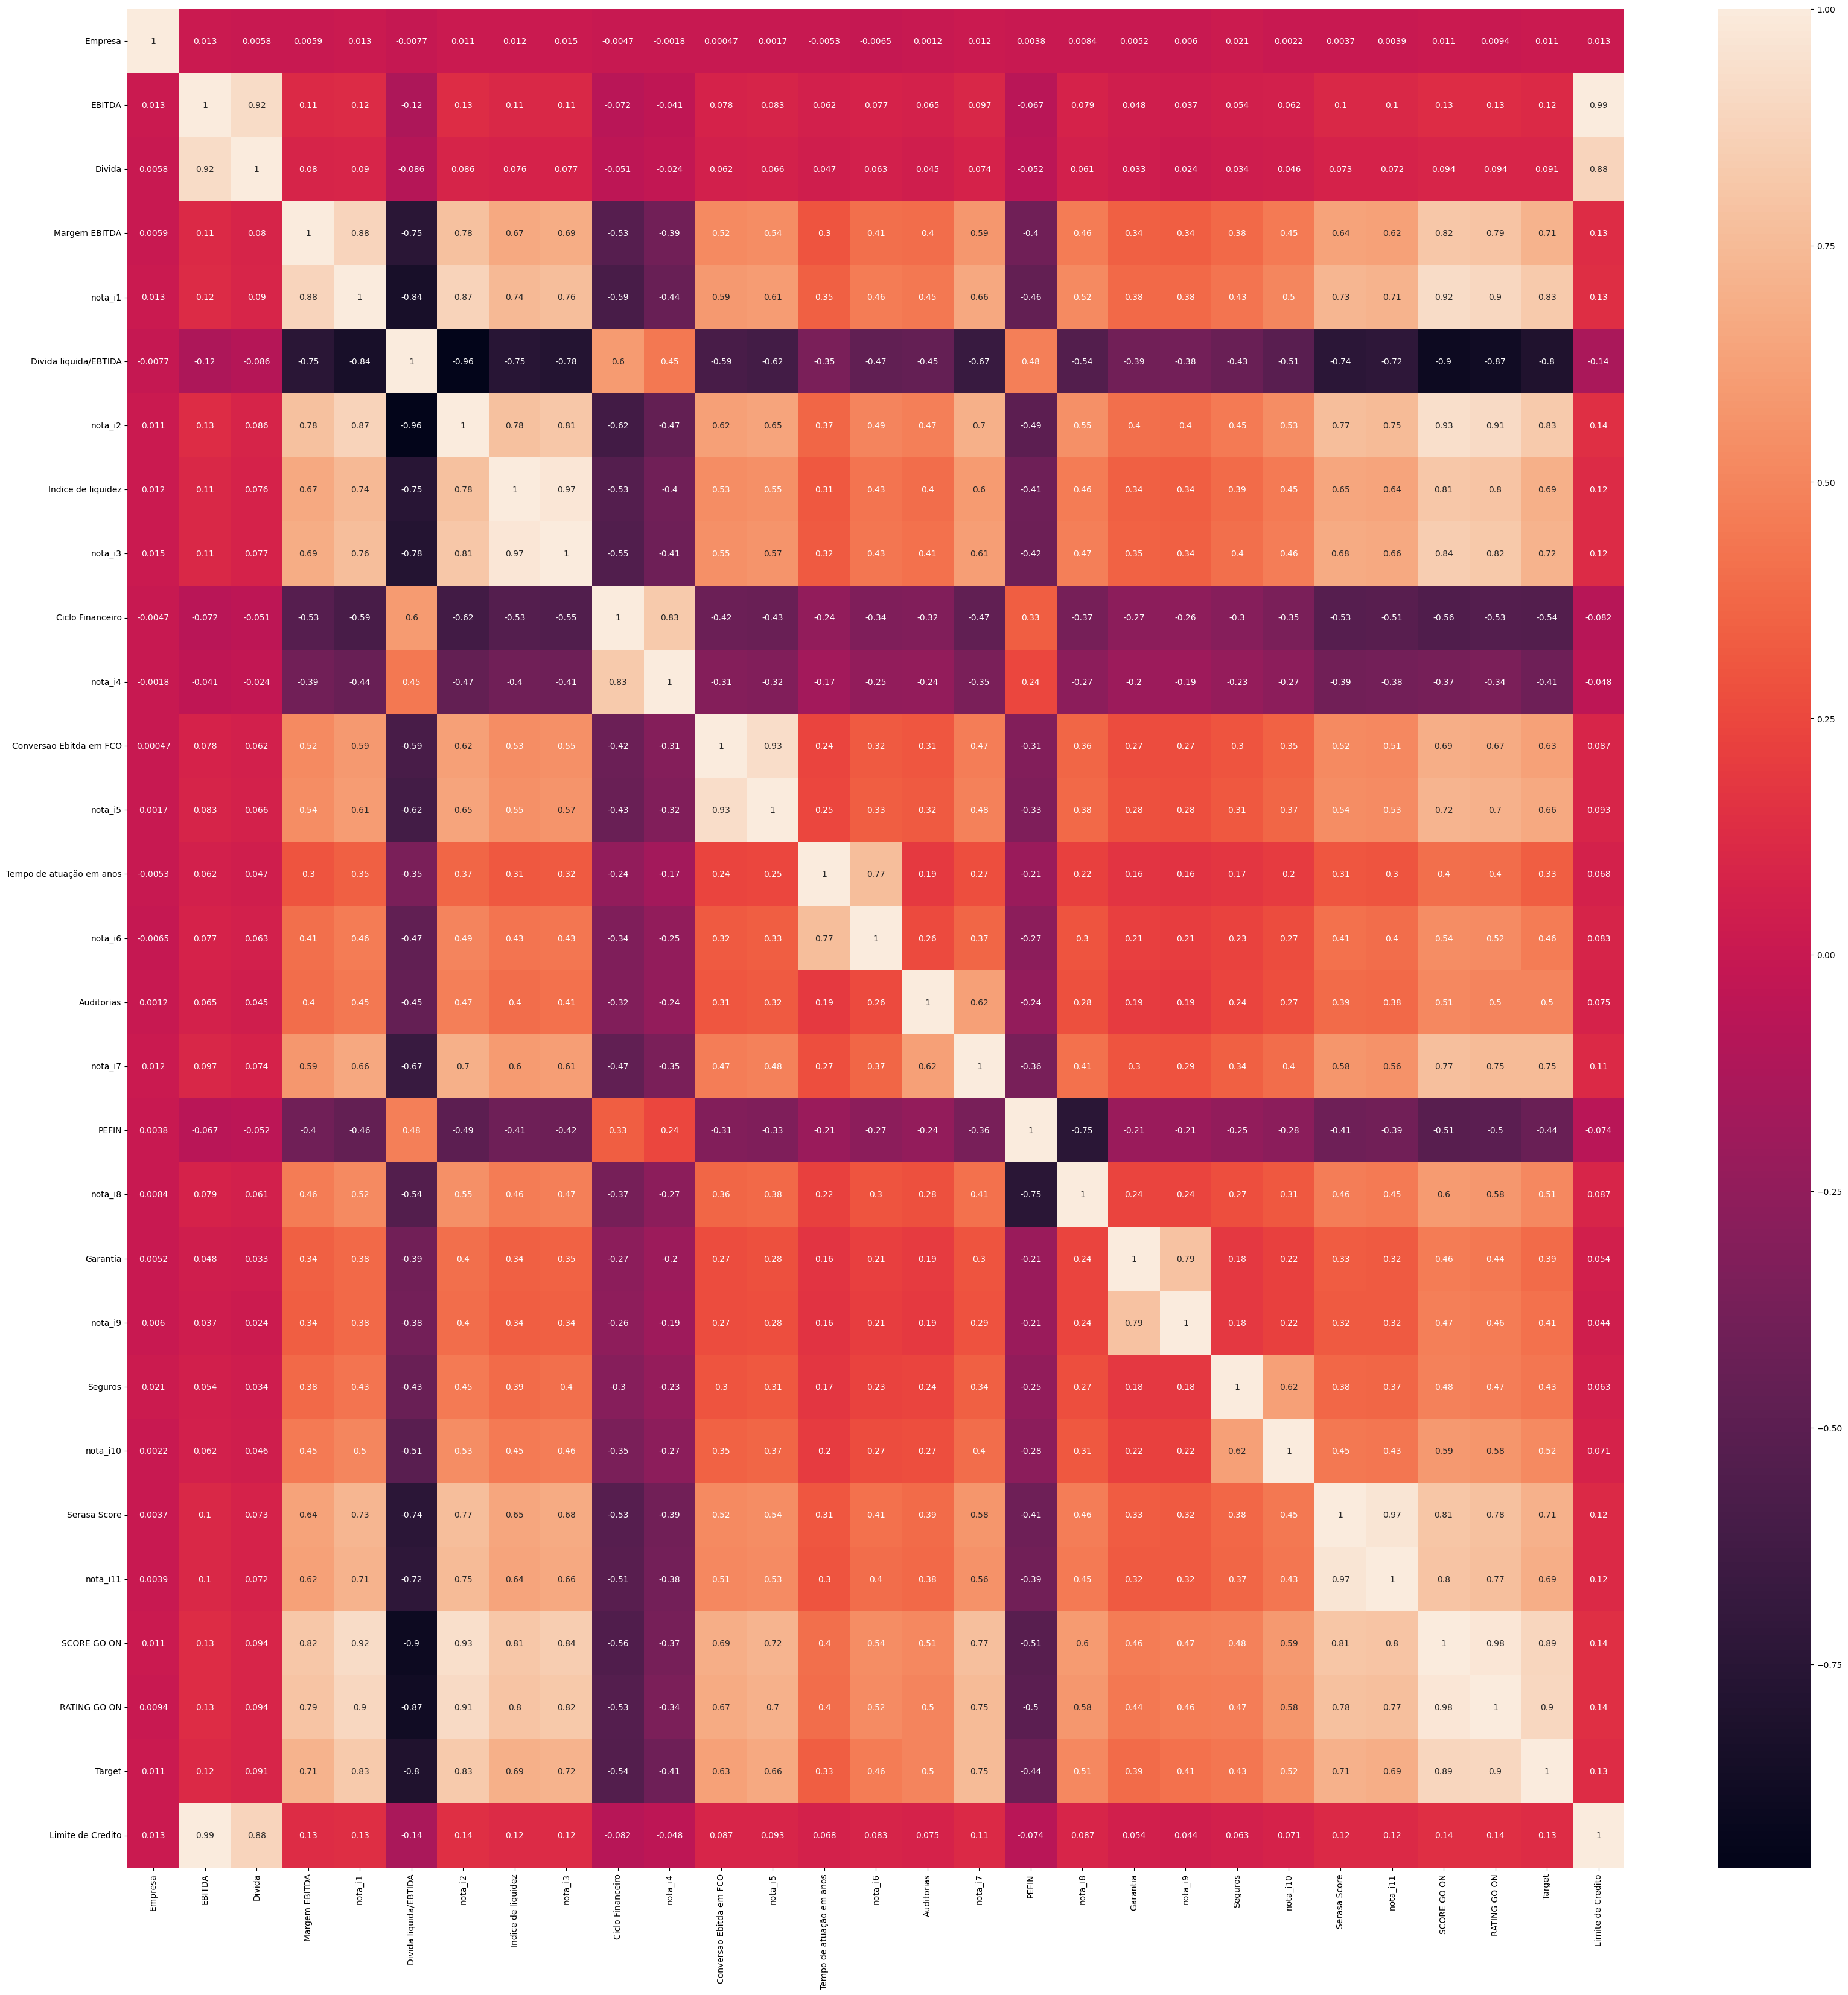

In [ ]:
f, ax = plt.subplots(figsize=(40,40)), sns.heatmap(correlations, annot = True);

* Lista das maiores Corrrelações de Pearson

In [ ]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').sort_values(ascending=False)
correlacoes

,Target
RATING GO ON,0.896689
SCORE GO ON,0.886879
nota_i2,0.829295
nota_i1,0.826889
nota_i7,0.751086
nota_i3,0.715331
Margem EBITDA,0.712198
Serasa Score,0.707769
Indice de liquidez,0.694956
nota_i11,0.692961


In [ ]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').abs().sort_values(ascending=False)
top_features = correlacoes.head(5).index  # Pegando as 5 mais correlacionadas

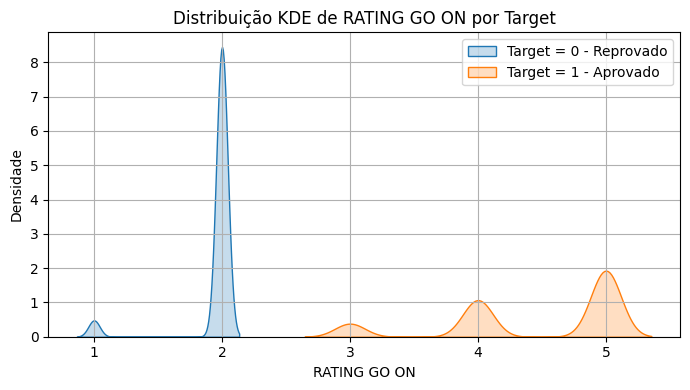

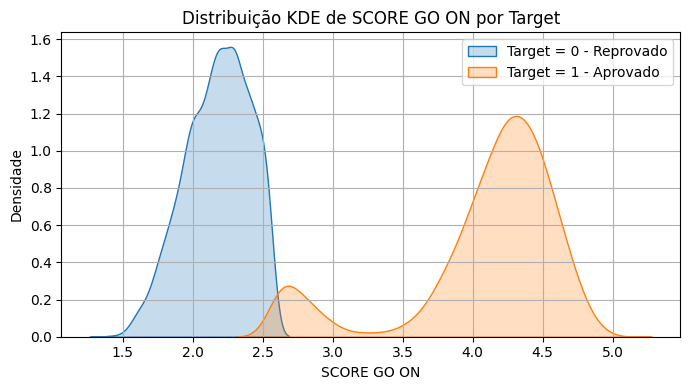

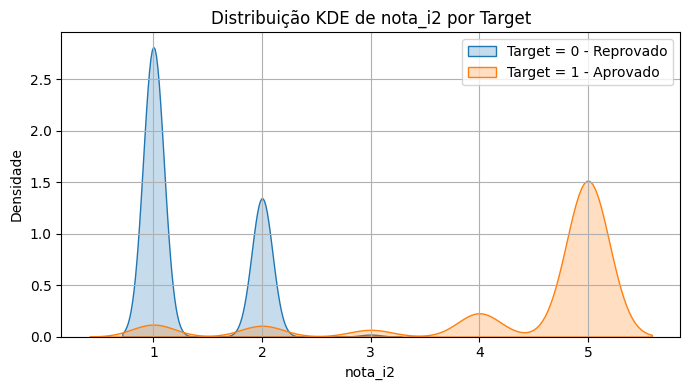

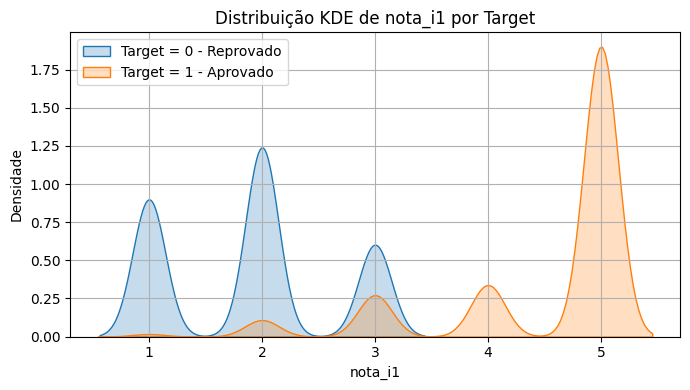

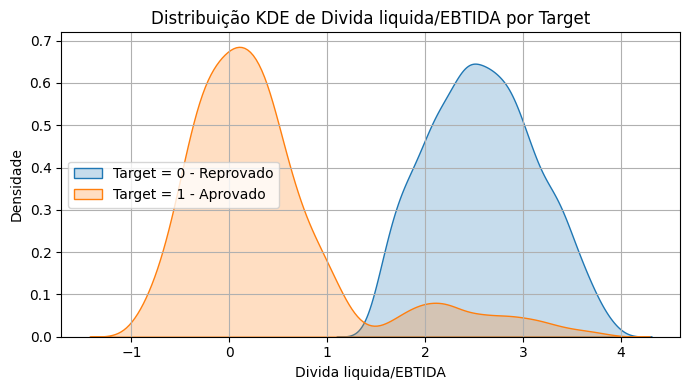

In [ ]:
for feature in top_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Phi-K

* Correlação de Phi-K
(Muito boa para correlacionar numeros com categorias e medir a dependencia dos valores.)

In [ ]:
# get the phi_k correlation matrix between all variables
phik = df.phik_matrix()
phik

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,0.000000,0.021785,0.000000,0.000000,0.028323,0.038805,0.000000,0.000000,0.035033,0.000000,0.021233,0.000000,0.000000,0.000000,0.000000,0.000000,0.040261,0.022832,0.011487,0.000000,0.016444,0.030700,0.000000,0.000000,0.000000,0.000000,0.017974,0.000000
EBITDA,0.000000,1.000000,0.963824,0.054038,0.044028,0.054292,0.060806,0.069113,0.067870,0.000000,0.022425,0.000000,0.043818,0.000000,0.034882,0.049470,0.052732,0.000000,0.018174,0.000000,0.000000,0.041910,0.073367,0.030041,0.044487,0.041239,0.051709,0.060639,0.969389
Divida,0.021785,0.963824,1.000000,0.048901,0.037660,0.065421,0.067145,0.038889,0.053018,0.000000,0.038366,0.000000,0.032310,0.000000,0.031572,0.024726,0.036580,0.000000,0.000000,0.000000,0.000000,0.019757,0.022211,0.035250,0.048496,0.037869,0.040331,0.052393,0.919412
Margem EBITDA,0.000000,0.054038,0.048901,1.000000,0.979584,0.738431,0.809145,0.716434,0.735339,0.573763,0.544299,0.575248,0.634441,0.187691,0.526751,0.498978,0.590820,0.464609,0.544395,0.337325,0.499918,0.575989,0.532814,0.662955,0.721354,0.779819,0.839793,0.961546,0.073706
nota_i1,0.000000,0.044028,0.037660,0.979584,1.000000,0.815886,0.841356,0.792567,0.622025,0.640778,0.597860,0.641541,0.687359,0.210661,0.580353,0.498753,0.472707,0.490242,0.430081,0.303558,0.322168,0.628362,0.452091,0.736198,0.767204,0.873533,0.876796,0.710606,0.063833
Divida liquida/EBTIDA,0.028323,0.054292,0.065421,0.738431,0.815886,1.000000,0.996808,0.740906,0.762023,0.598692,0.565333,0.599847,0.662591,0.194923,0.550496,0.522873,0.618292,0.486850,0.570540,0.356274,0.529839,0.599708,0.556730,0.688239,0.748439,0.771007,0.840784,0.969407,0.075341
nota_i2,0.038805,0.060806,0.067145,0.809145,0.841356,0.996808,1.000000,0.811765,0.644559,0.658157,0.614291,0.660890,0.706007,0.220594,0.599197,0.517390,0.492125,0.505379,0.446401,0.316168,0.335042,0.645887,0.467232,0.755235,0.784005,0.845731,0.863494,0.715854,0.096242
Indice de liquidez,0.000000,0.069113,0.038889,0.716434,0.792567,0.740906,0.811765,1.000000,0.978410,0.573420,0.542672,0.580465,0.640968,0.192891,0.533109,0.502337,0.594522,0.468311,0.548835,0.341067,0.504174,0.574317,0.533075,0.666088,0.724595,0.757177,0.822831,0.946345,0.086254
nota_i3,0.000000,0.067870,0.053018,0.735339,0.622025,0.762023,0.644559,0.978410,1.000000,0.577468,0.374011,0.579978,0.456907,0.233489,0.361459,0.562013,0.784201,0.724780,0.743010,0.381440,0.594852,0.399902,0.409022,0.677516,0.544125,0.781711,0.658777,0.972286,0.069256
Ciclo Financeiro,0.035033,0.000000,0.000000,0.573763,0.640778,0.598692,0.658157,0.573420,0.577468,1.000000,0.958475,0.440132,0.486805,0.127660,0.397136,0.370545,0.442112,0.344606,0.403020,0.249814,0.356710,0.432951,0.404995,0.525687,0.572696,0.669931,0.719010,0.711843,0.000000


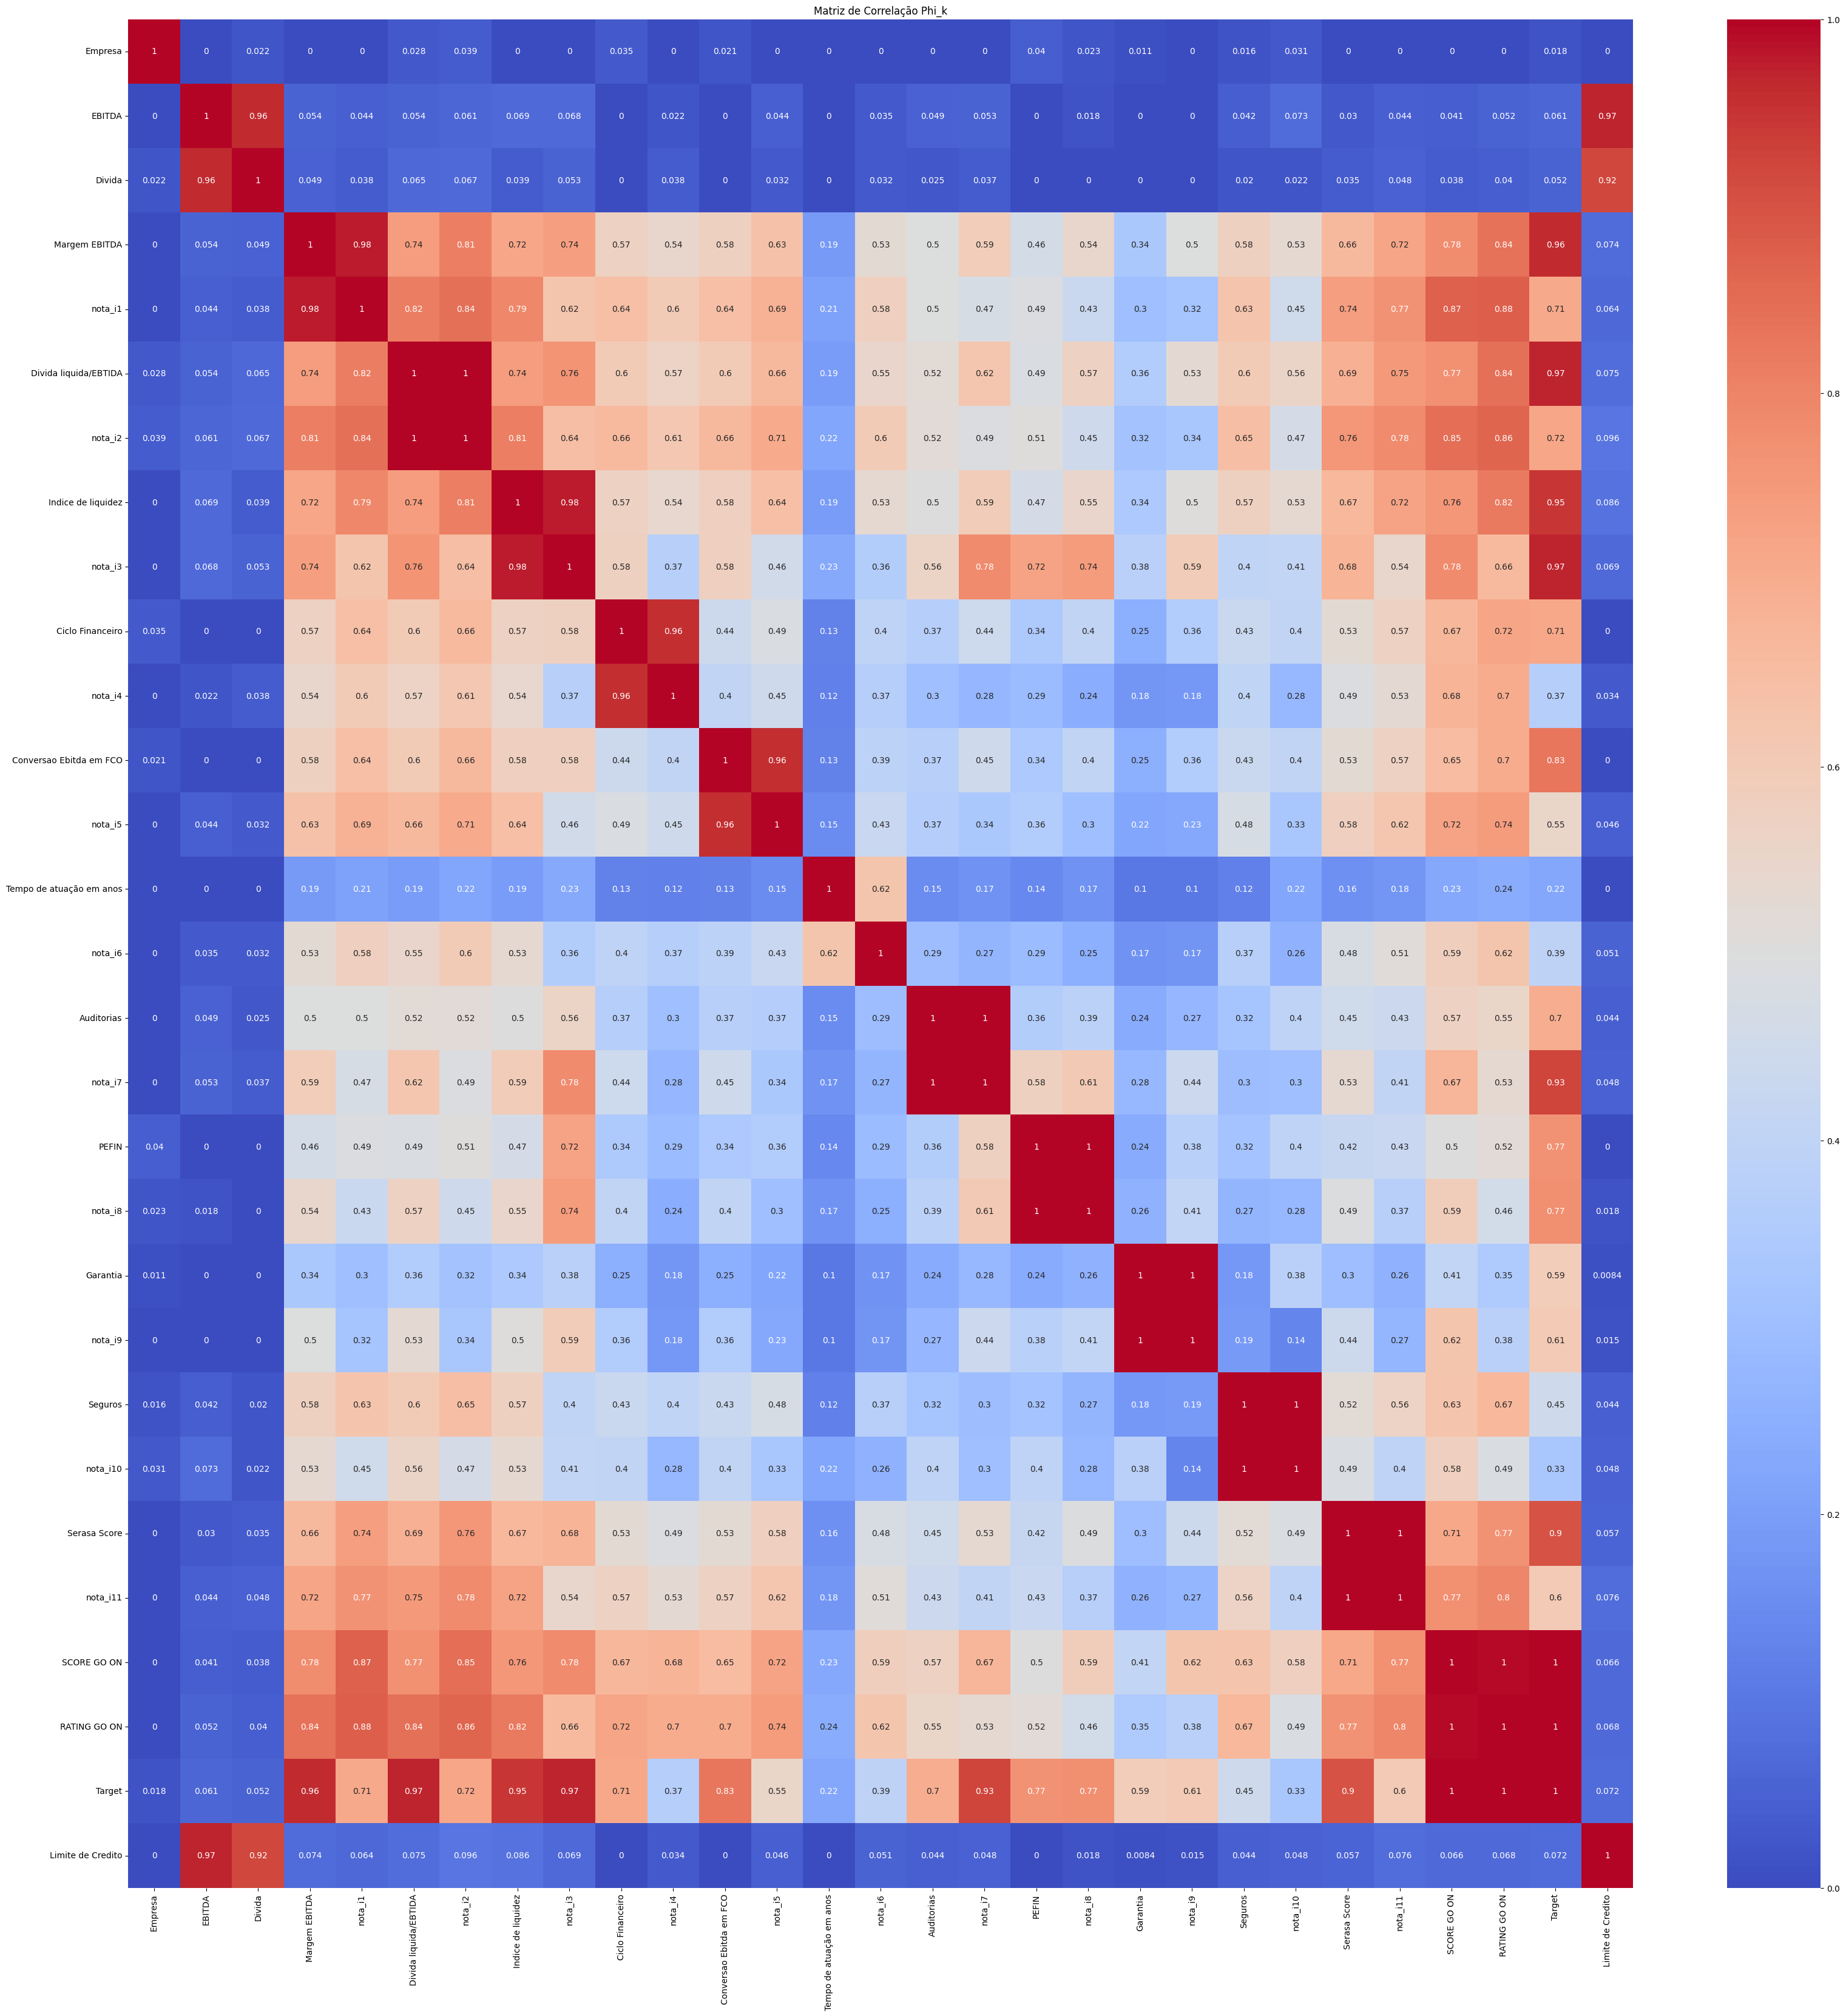

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(phik, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de Correlação Phi_k")
plt.show()

* Matriz de Significancia

In [ ]:
# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
df.significance_matrix()

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,212.940978,0.384150,1.058887,-1.449434,-0.776412,0.575259,1.244462,-1.087058,-0.392353,0.803276,-0.212653,0.088871,-1.073762,-0.746218,-1.200897,-0.118442,-0.634895,2.093063,0.710736,0.176358,-1.215397,0.230101,1.076916,-1.447386,-1.928325,-0.048959,-0.296595,0.641725,0.456676
EBITDA,0.384150,35.186407,27.328164,4.245280,4.623812,4.594463,5.544188,4.792568,6.205747,0.866782,1.055071,2.487958,3.736223,2.286201,2.113534,4.108291,4.698933,0.917533,1.733575,0.012680,-0.237588,2.402363,2.840155,2.636439,3.056531,4.434017,5.937517,6.924271,32.180592
Divida,1.058887,27.328164,34.606578,3.229483,3.013002,3.743058,3.929808,2.194224,4.138120,0.903795,2.482575,1.139638,2.372293,1.452825,1.954821,1.899705,3.104298,-0.170113,0.828644,0.076047,0.484421,1.249857,1.062903,1.979692,2.573124,3.500949,4.556075,5.514587,25.130584
Margem EBITDA,-1.449434,4.245280,3.229483,210.425548,146.586711,105.862389,106.956495,99.892281,107.862202,64.774585,53.744423,64.550851,65.461056,24.152583,49.621308,71.285305,71.958251,66.909461,65.367963,40.359170,37.942358,55.471373,53.680475,84.245951,83.467257,112.022185,111.058067,91.162597,4.285041
nota_i1,-0.776412,4.623812,3.013002,146.586711,165.904058,108.021329,108.588850,101.935060,109.325230,66.984138,55.015663,66.915818,67.157790,25.795683,51.025145,73.249635,73.606344,68.862243,66.720991,42.060489,39.070604,56.911294,54.982827,86.396544,85.142103,116.147174,114.138340,93.271820,4.567084
Divida liquida/EBTIDA,0.575259,4.594463,3.743058,105.862389,108.021329,202.866619,148.139593,106.251321,114.264460,68.804285,57.023772,68.586698,69.583551,25.901912,52.539639,75.450458,76.053731,71.175853,69.683061,42.998598,40.254292,58.661622,56.759795,89.648111,88.826074,113.720806,114.213408,92.753169,4.357728
nota_i2,1.244462,5.544188,3.929808,106.956495,108.588850,148.139593,157.621580,107.347957,114.712951,69.957274,57.862099,69.899373,70.144167,27.364951,53.396277,76.278263,76.571303,72.080493,70.140477,44.061705,40.574201,59.231184,57.094555,90.681482,89.377661,114.993839,114.959964,93.114584,5.750590
Indice de liquidez,-1.087058,4.792568,2.194224,99.892281,101.935060,106.251321,107.347957,210.845850,153.467858,64.633615,53.306459,65.471922,66.485851,24.509126,50.244504,71.838094,72.451495,67.481190,66.001938,40.739321,38.316421,55.428227,53.827322,84.799863,83.974709,108.900926,108.753834,88.372751,4.476321
nota_i3,-0.392353,6.205747,4.138120,107.862202,109.325230,114.264460,114.712951,153.467858,162.796614,70.662919,58.274892,70.518933,70.686474,27.886524,53.822472,76.844785,77.063774,72.826943,70.706213,44.321633,40.813002,59.574222,57.377349,91.500820,90.010688,116.920501,116.099484,93.241497,6.014758
Ciclo Financeiro,0.803276,0.866782,0.903795,64.774585,66.984138,68.804285,69.957274,64.633615,70.662919,191.396551,128.234074,42.652057,44.174999,14.448069,33.978898,47.744289,48.559869,44.748527,44.079540,27.942001,26.718837,37.679410,37.189161,56.066787,56.282058,78.553229,76.795136,57.784834,1.264231


* Lista das maiores Corrrelações de Phi-K

In [ ]:
phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
phik_corrs

,Target
RATING GO ON,1.000000
SCORE GO ON,0.996984
nota_i3,0.972286
Divida liquida/EBTIDA,0.969407
Margem EBITDA,0.961546
Indice de liquidez,0.946345
nota_i7,0.925489
Serasa Score,0.900222
Conversao Ebitda em FCO,0.829165
nota_i8,0.774644


In [ ]:
#phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
top_featurespk = phik_corrs.head(5).index

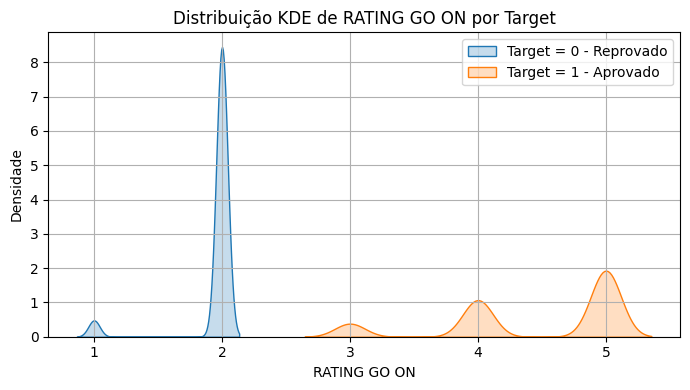

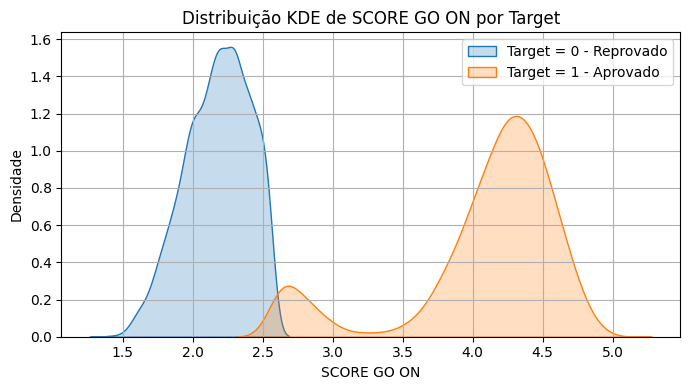

<ipython-input-30-5d77d89c6984>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)


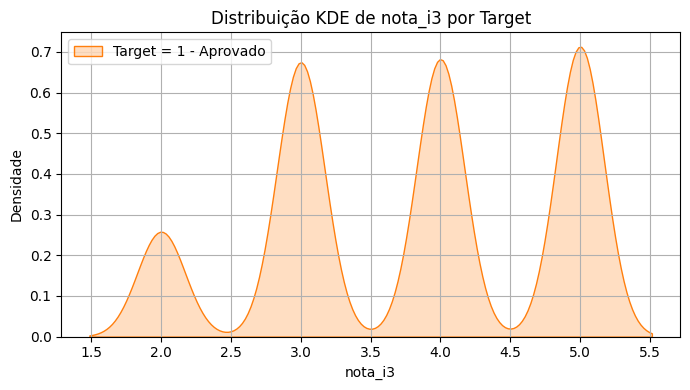

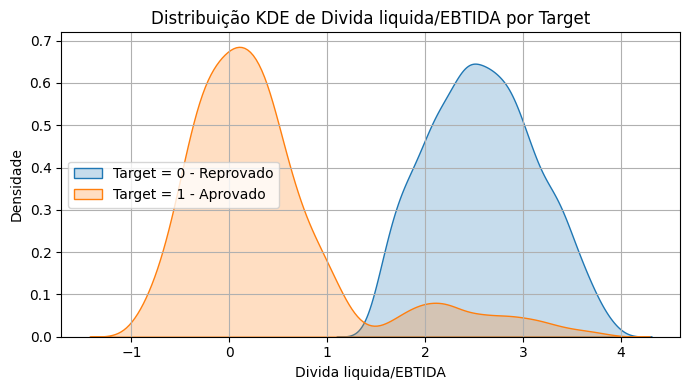

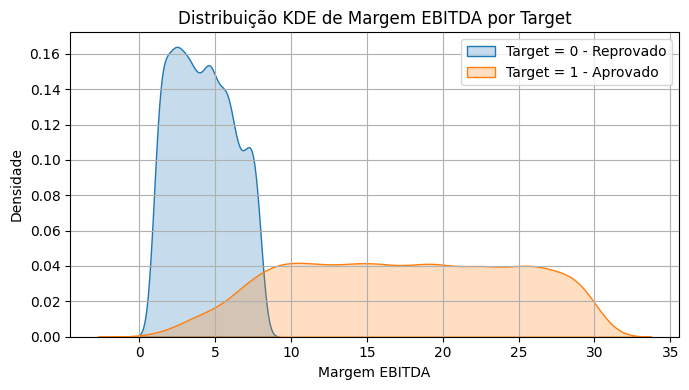

In [ ]:
for feature in top_featurespk:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Distribuições

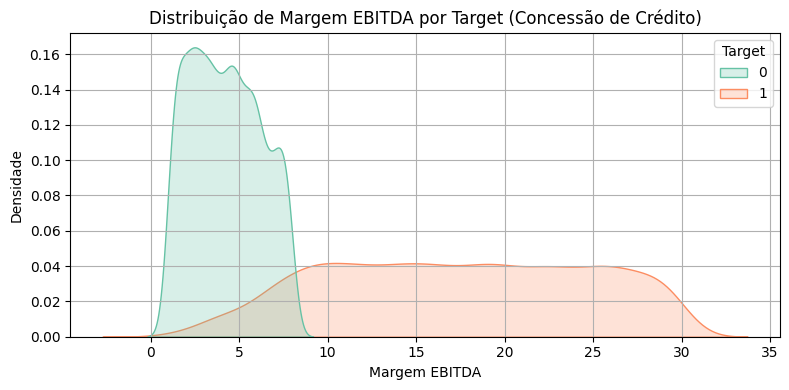

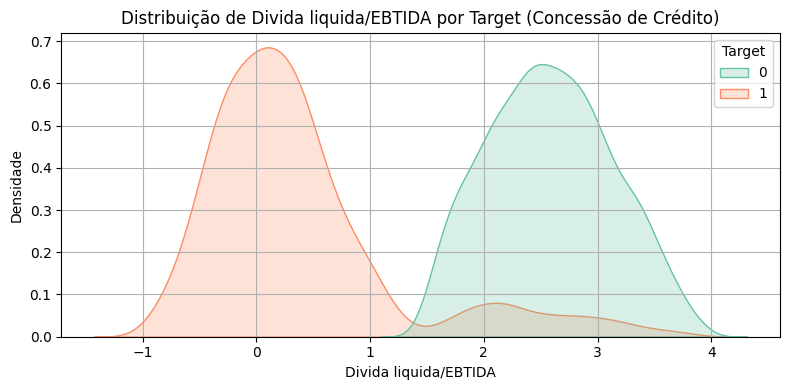

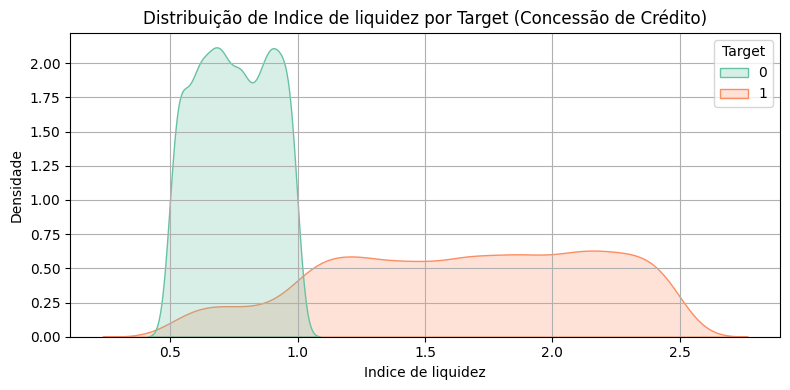

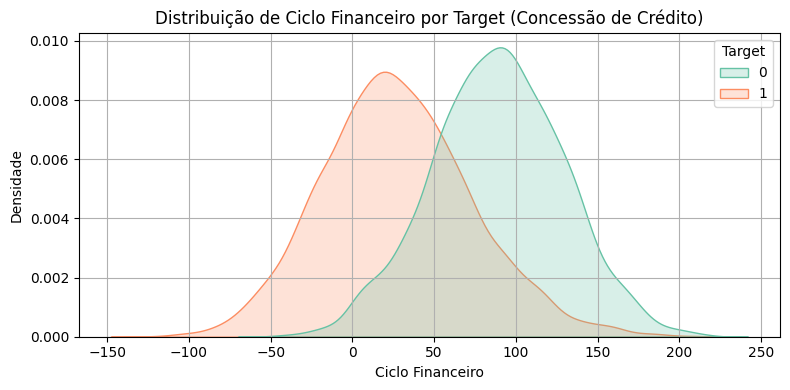

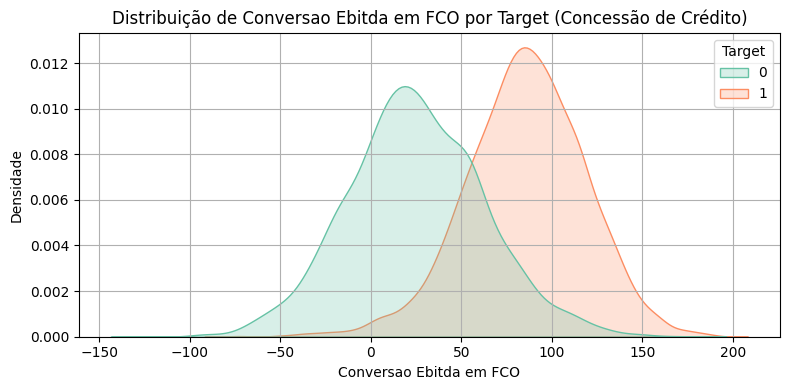

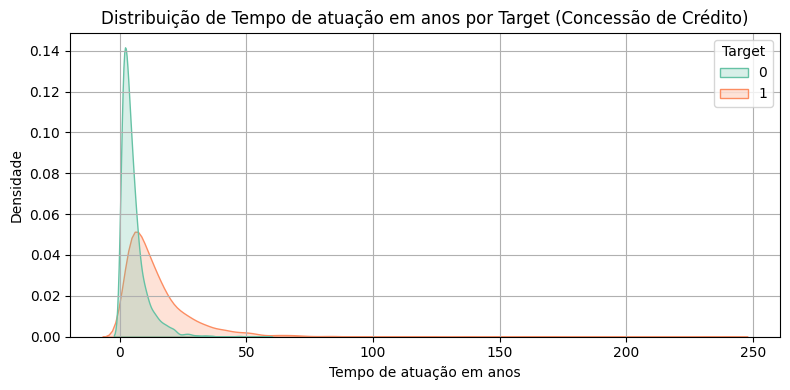

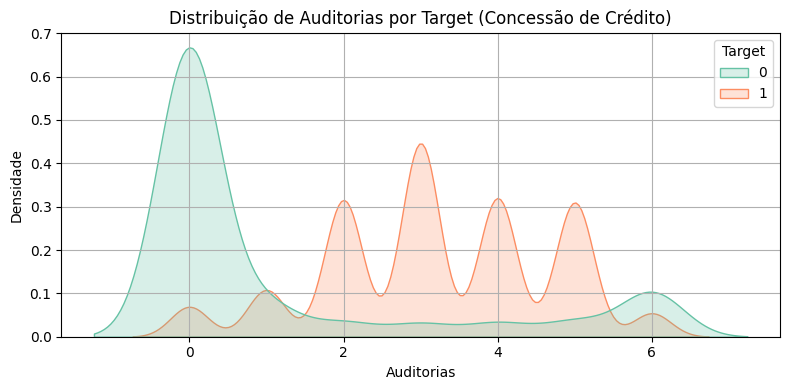

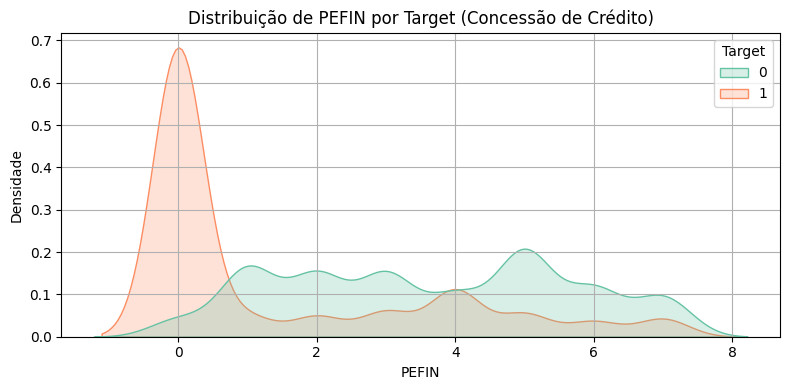

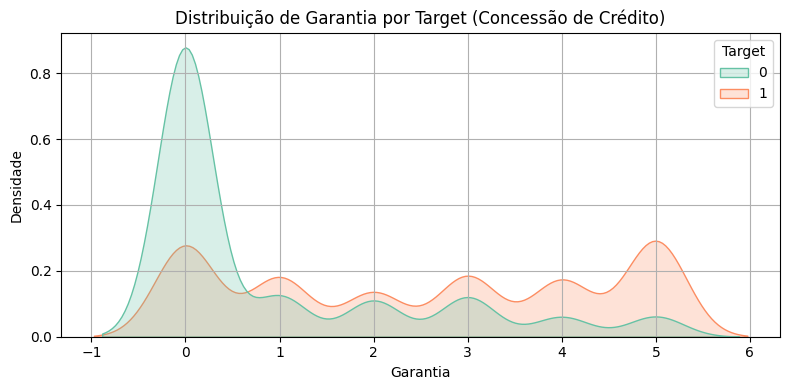

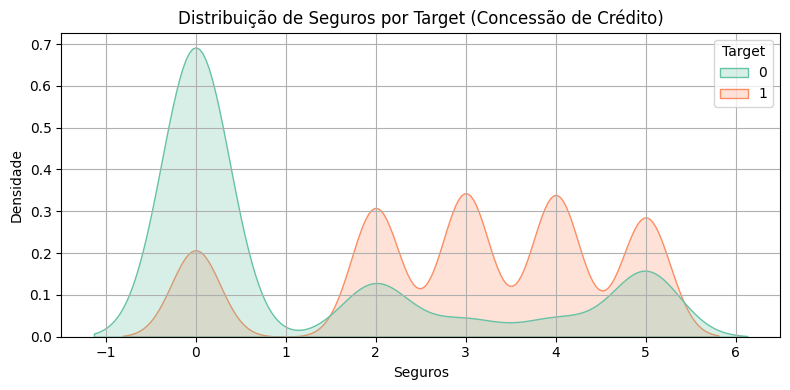

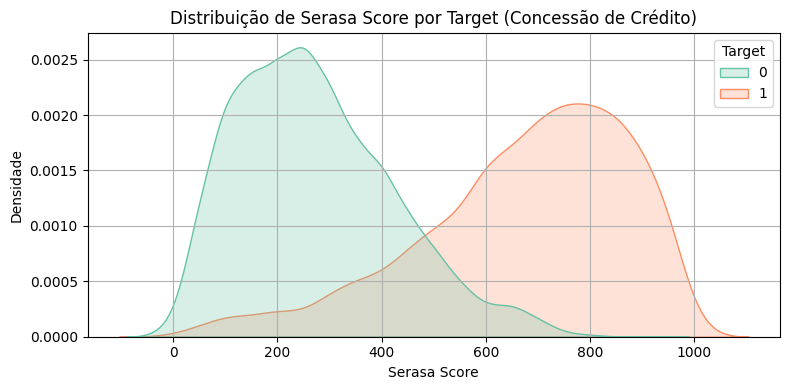

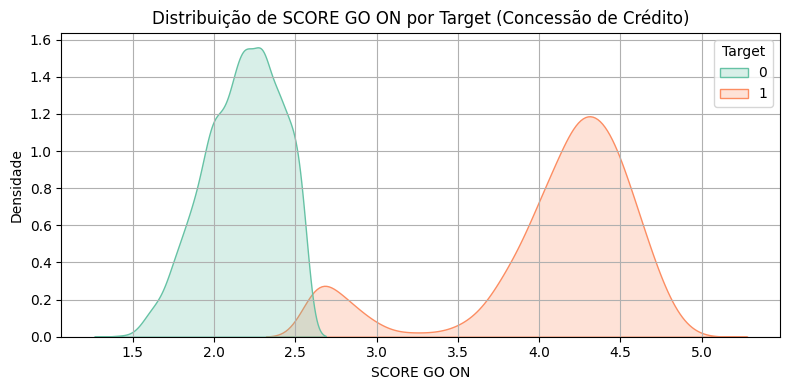

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

indicadores = [ 'Margem EBITDA', 'Divida liquida/EBTIDA', 'Indice de liquidez',
               'Ciclo Financeiro', 'Conversao Ebitda em FCO', 'Tempo de atuação em anos','Auditorias','PEFIN', 'Garantia', 'Seguros', 'Serasa Score',
               'SCORE GO ON']

for col in indicadores:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Target', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {col} por Target (Concessão de Crédito)')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Cópia do dataframe e renomeando a coluna Target
df_plot = df.copy()
df_plot['Target'] = df_plot['Target'].map({0: 'Reprovado', 1: 'Aprovado'})

indicadores = [
    'Margem EBITDA', 'Divida liquida/EBTIDA', 'Indice de liquidez',
    'Ciclo Financeiro', 'Conversao Ebitda em FCO', 'Tempo de atuação em anos',
    'Auditorias', 'PEFIN', 'Garantia', 'Seguros', 'Serasa Score', 'SCORE GO ON','RATING GO ON'
]

# Lista para armazenar os objetos das figuras
figuras = []

# Criação dos gráficos
for col in indicadores:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df_plot, x=col, hue='Target', fill=True,
                common_norm=False, palette='Set2', alpha=0.6)
    plt.title(f'Distribuição de {col} por Concessão de Crédito')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Salva a figura atual na lista
    fig = plt.gcf()  # Get current figure gerenciada por pyplot
    figuras.append(fig)
    plt.close()  # Evita mostrar aqui

# Salva as figuras num arquivo .pkl
with open('graficos_credito.pkl', 'wb') as f:
    pickle.dump(figuras, f)


### Notas vs Indicadores

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


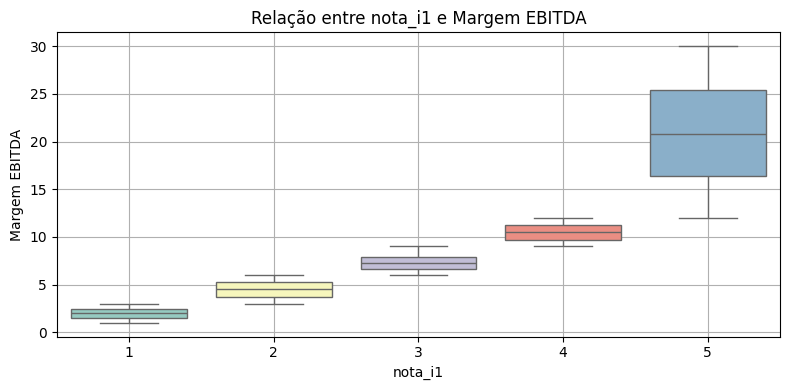

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


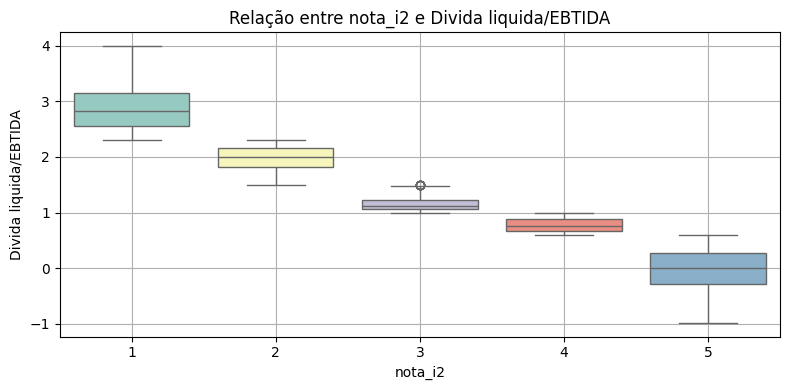

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


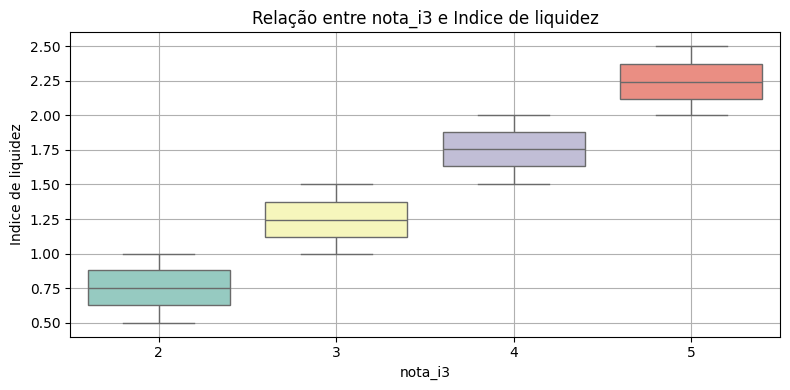

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


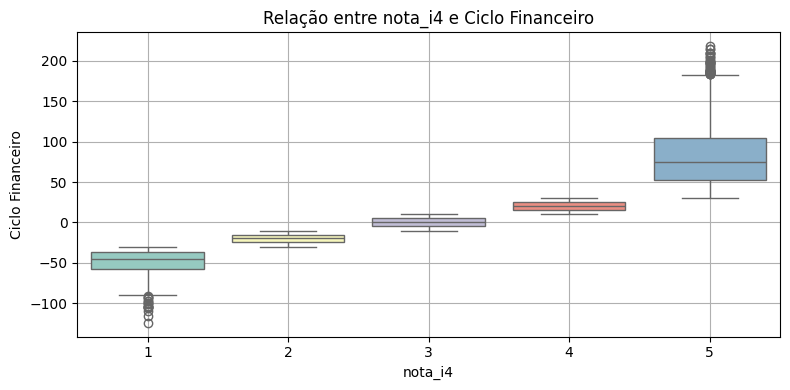

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


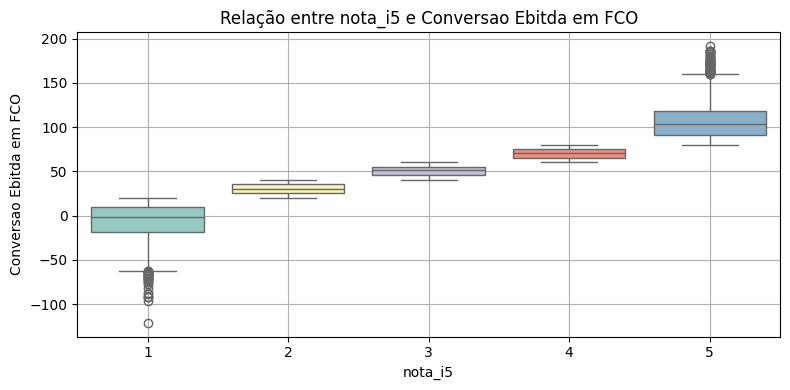

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


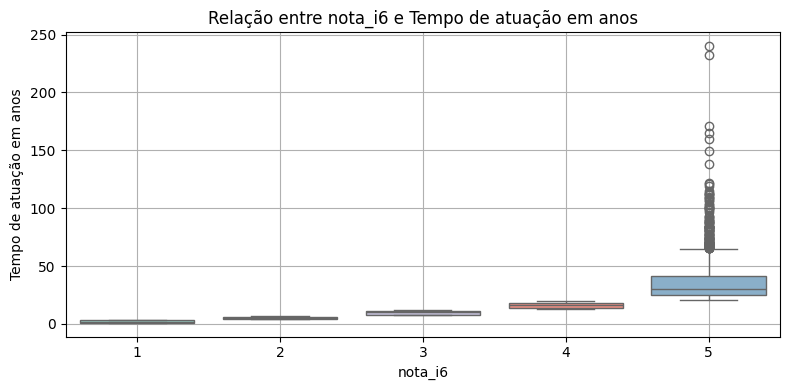

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


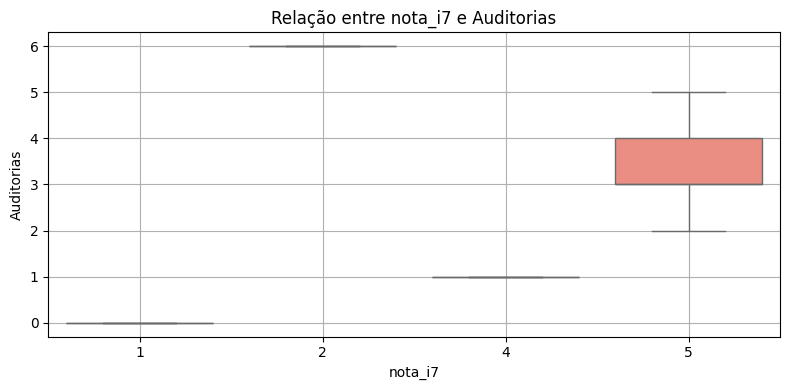

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


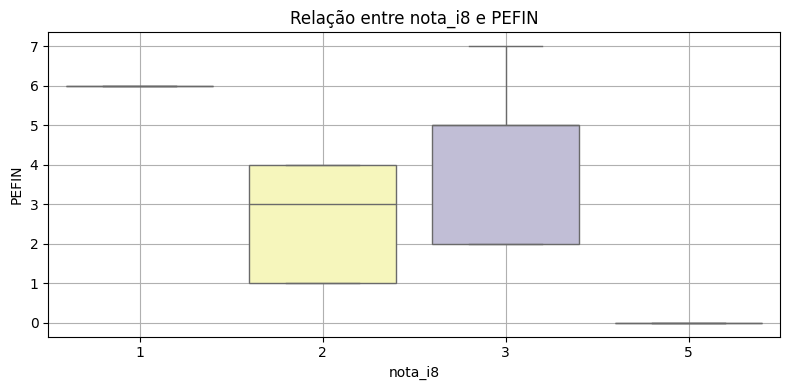

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


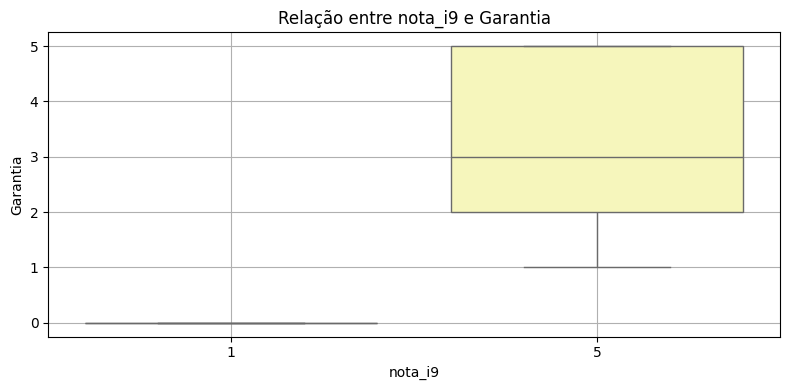

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


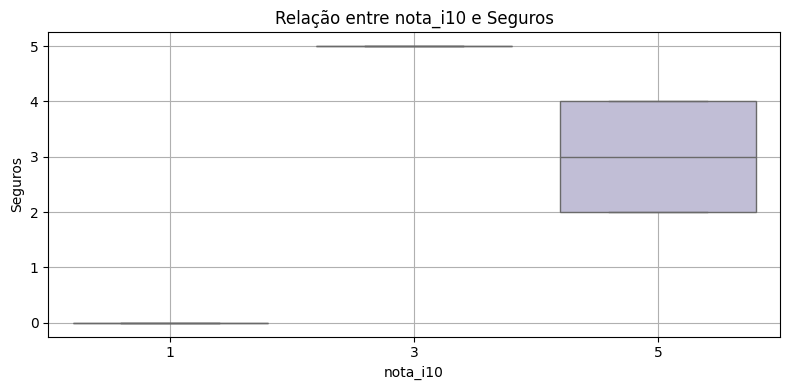

<ipython-input-34-3349b23287b5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


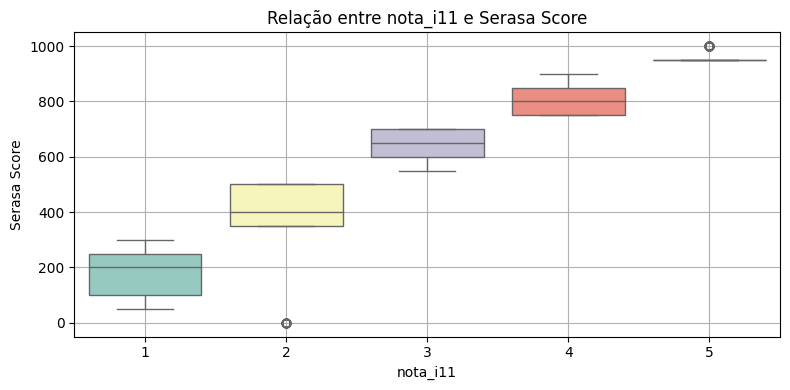

In [ ]:
notas_vs_indicadores = {
    'nota_i1': 'Margem EBITDA',
    'nota_i2': 'Divida liquida/EBTIDA',
    'nota_i3': 'Indice de liquidez',
    'nota_i4': 'Ciclo Financeiro',
    'nota_i5': 'Conversao Ebitda em FCO',
    'nota_i6': 'Tempo de atuação em anos',
    'nota_i7': 'Auditorias',
    'nota_i8': 'PEFIN',
    'nota_i9': 'Garantia',
    'nota_i10': 'Seguros',
    'nota_i11': 'Serasa Score'
}

for nota, indicador in notas_vs_indicadores.items():
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')
    plt.title(f'Relação entre {nota} e {indicador}')
    plt.xlabel(nota)
    plt.ylabel(indicador)
    plt.grid(True)
    plt.tight_layout()
    plt.show()